In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.io as sio
import h5py
import scipy.signal as scisig
import importlib
import analysis_utils as au
import cmath

In [95]:
filename = r'C:\Users\thoma\Documents\SIMPLE\Data\Lab data\Lorentz force\Magsweep2506103V.hdf5'
data = au.load_data_hdf52(filename)
amps_pos = data['amps']
phases_pos = data['phases']
cfs_pos = data['cfs']

cal3 = 3.21e-10

cf_rs = cfs_pos[:,:, 0, 0].reshape((20000))
amp_rs = amps_pos[:,:, 0, 0].reshape((20000))

cf_rs2 = cfs_pos[:,:, 1, 0].reshape((20000))
amp_rs2 = amps_pos[:,:, 1, 0].reshape((20000))

cf_rs3 = cfs_pos[:,:, 2, 0].reshape((20000))
amp_rs3 = amps_pos[:,:, 2, 0].reshape((20000))

phase_rs = phases_pos[:,:, 0, 0].reshape((20000))
phase_rs2 = phases_pos[:,:, 1, 0].reshape((20000))
phase_rs3 = phases_pos[:,:, 2, 0].reshape((20000))

phase_rs_g = np.array([])
amp_rs_g = np.array([])
for i in range(int(len(phase_rs)/100)):
    var = np.var(phase_rs[i*100:(i+1)*100])
    if var < 0.01:
        if np.mean(phase_rs[i*100:(i+1)*100]) < -3:
            #phase_rs_g = np.concatenate((phase_rs_g, np.pi+ phase_rs[i*100:(i+1)*100]))
            print(1)
        else:
            phase_rs_g = np.concatenate((phase_rs_g, phase_rs[i*100:(i+1)*100]))
            amp_rs_g = np.concatenate((amp_rs_g, amp_rs[i*100:(i+1)*100]))

phase_rs2_g = np.array([])
amp_rs2_g = np.array([])
for i in range(int(len(phase_rs2)/100)):
    var = np.var(phase_rs2[i*100:(i+1)*100])
    if var < 0.01:
        if np.mean(phase_rs2[i*100:(i+1)*100]) < -3:
            #phase_rs2_g = np.concatenate((phase_rs2_g, np.pi+ phase_rs2[i*100:(i+1)*100]))
            print(1)
        else:
            phase_rs2_g = np.concatenate((phase_rs2_g, phase_rs2[i*100:(i+1)*100]))
            amp_rs2_g = np.concatenate((amp_rs2_g, amp_rs2[i*100:(i+1)*100]))

phase_rs3_g = np.array([])
amp_rs3_g = np.array([])
for i in range(int(len(phase_rs3)/100)):
    var = np.var(phase_rs3[i*100:(i+1)*100])
    if var < 0.01:
        if np.mean(phase_rs3[i*100:(i+1)*100]) < -3:
            #phase_rs3_g = np.concatenate((phase_rs3_g, np.pi+ phase_rs3[i*100:(i+1)*100]))
            print(1)
        else:
            phase_rs3_g = np.concatenate((phase_rs3_g, phase_rs3[i*100:(i+1)*100]))
            amp_rs3_g = np.concatenate((amp_rs3_g, amp_rs3[i*100:(i+1)*100]))
"""
amp_rs_g = amp_rs_g[phase_rs_g<-2.45]
amp_rs2_g = amp_rs2_g[phase_rs2_g<-2.45]
amp_rs3_g = amp_rs3_g[phase_rs3_g<-2.45]

phase_rs_g = phase_rs_g[phase_rs_g<-2.45]
phase_rs2_g = phase_rs2_g[phase_rs2_g<-2.45]
phase_rs3_g = phase_rs3_g[phase_rs3_g<-2.45]

"""

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


'\namp_rs_g = amp_rs_g[phase_rs_g<-2.45]\namp_rs2_g = amp_rs2_g[phase_rs2_g<-2.45]\namp_rs3_g = amp_rs3_g[phase_rs3_g<-2.45]\n\nphase_rs_g = phase_rs_g[phase_rs_g<-2.45]\nphase_rs2_g = phase_rs2_g[phase_rs2_g<-2.45]\nphase_rs3_g = phase_rs3_g[phase_rs3_g<-2.45]\n\n'

-2.4394663971860253
-2.4347134747811747
-2.4399708567374767


ValueError: operands could not be broadcast together with shapes (15500,) (15100,) 

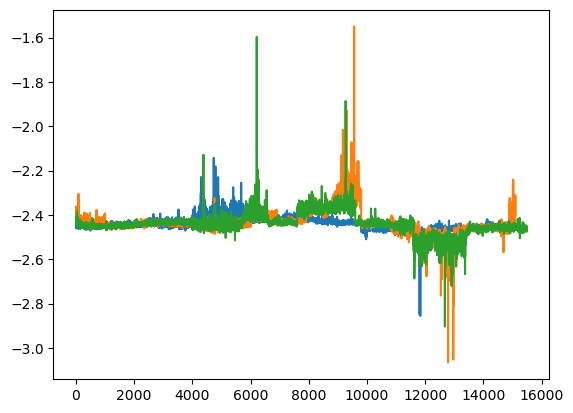

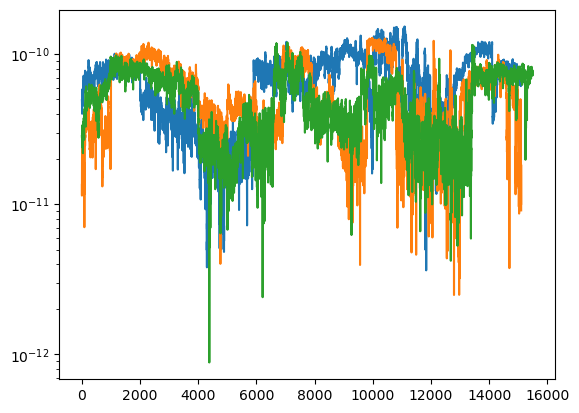

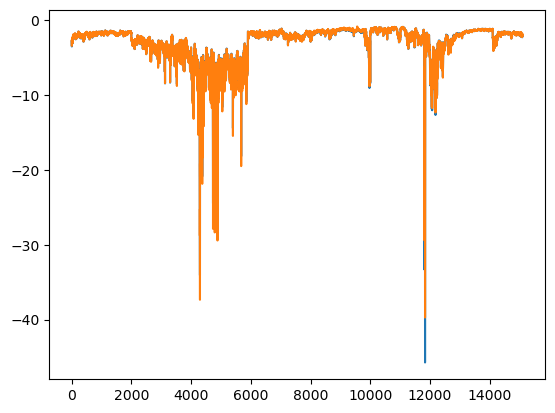

In [109]:
plt.plot(phase_rs_g[:])
plt.plot(phase_rs2_g)
plt.plot(phase_rs3_g)

plt.figure()
plt.plot(amp_rs_g[:]*cal3*np.sqrt(10))
plt.plot(amp_rs2_g*cal3*np.sqrt(10))
plt.plot(amp_rs3_g*cal3*np.sqrt(10))
plt.yscale('log')
print(np.mean(phase_rs_g))
print(np.mean(phase_rs2_g))
print(np.mean(phase_rs3_g))
#plt.plot(phase_rs_g+np.pi)

mean = (np.mean(amp_rs_g)+np.mean(amp_rs2_g)+np.mean(amp_rs3_g))/3

plt.figure()
plt.plot(phase_rs_g*mean/amp_rs_g)
plt.plot(phase_rs2_g*mean/amp_rs_g)
plt.plot(phase_rs3_g*mean/amp_rs_g)

In [108]:
prg_lp = au.butter_lowpass_filter(phase_rs_g, highcut = 0.1, fs = 10, order = 3)
prg2_lp = au.butter_lowpass_filter(phase_rs2_g, highcut = 0.1, fs = 10, order = 3)
prg3_lp = au.butter_lowpass_filter(phase_rs3_g, highcut = 0.1, fs = 10, order = 3)

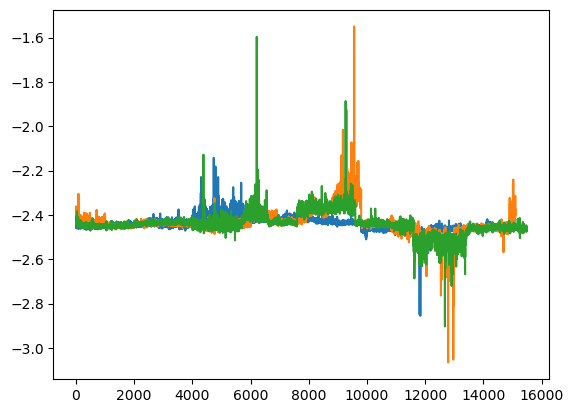

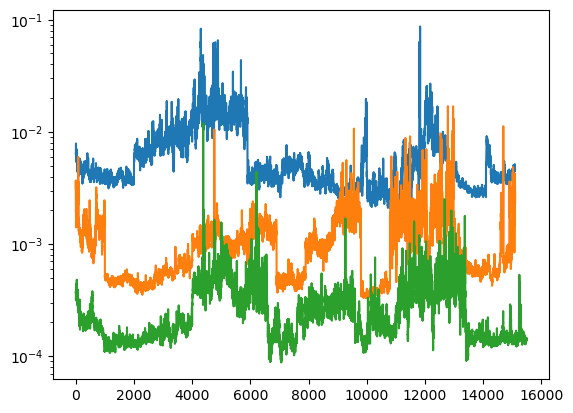

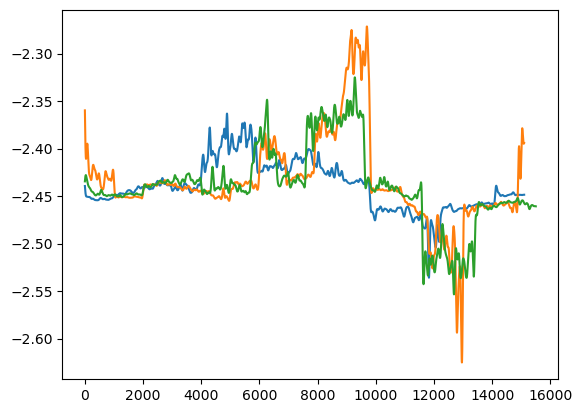

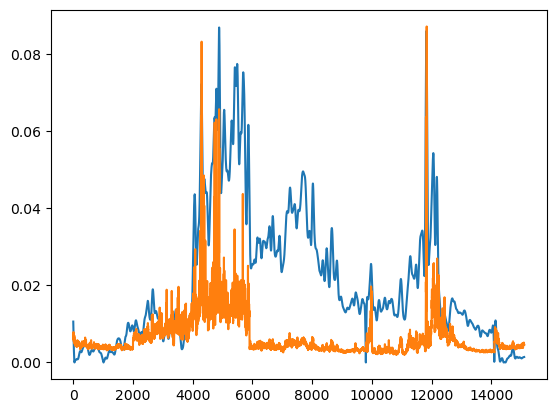

In [ ]:
lb = 0
ub = -1
plt.plot(phase_rs_g[lb:ub])
plt.plot(phase_rs2_g[lb:ub])
plt.plot(phase_rs3_g[lb:ub])
plt.figure()
plt.plot(10**(-13)/(amp_rs_g[lb:ub]*cal3))
plt.plot(10**(-13)*400/3000/(amp_rs2_g[lb:ub]*cal3))
plt.plot(10**(-13)*100/3000/(amp_rs3_g[lb:ub]*cal3))
plt.yscale('log')
plt.figure()
plt.plot(prg_lp[lb:ub])
plt.plot(prg2_lp[lb:ub])
plt.plot(prg3_lp[lb:ub])

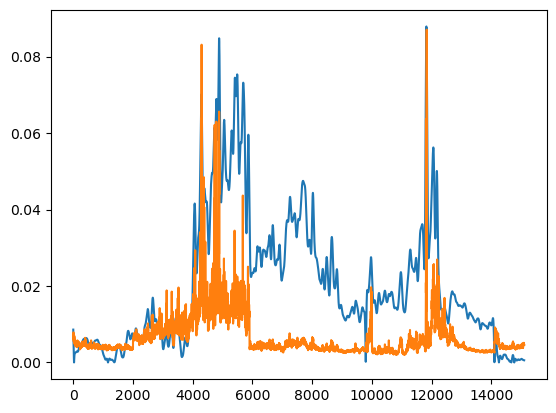

In [121]:

plt.figure()
plt.plot(abs(prg_lp[lb:ub]+2.448))
plt.plot(10**(-13)/(amp_rs_g[lb:ub]*cal3))

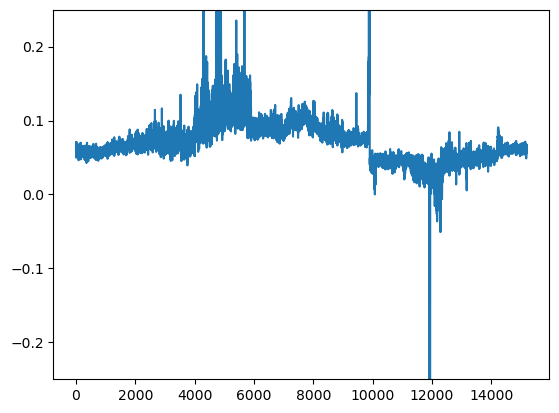

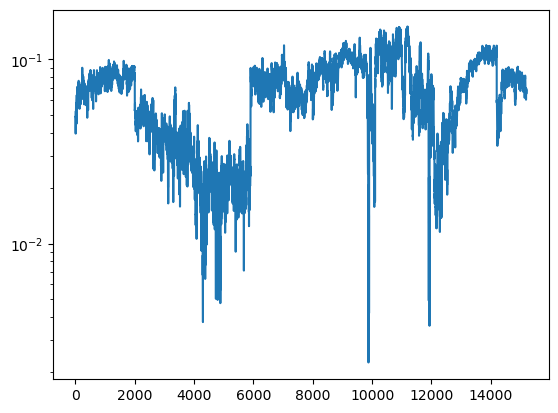

In [94]:
plt.plot(phase_rs_g+2.5+0.01)
plt.ylim(-0.25, 0.25)
plt.figure()
plt.plot(amp_rs_g)
plt.yscale('log')

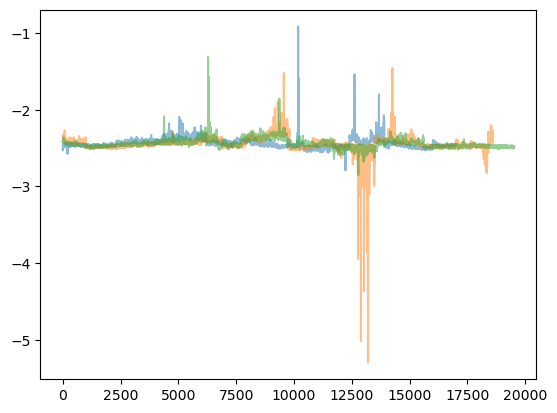

In [69]:
phase_rs_g_mod = phase_rs_g/(amp_rs_g+np.mean(phase_rs_g)-np.mean(amp_rs_g))*np.mean(amp_rs_g+np.mean(phase_rs_g)-np.mean(amp_rs_g))
phase_rs2_g_mod = phase_rs2_g/(amp_rs2_g+np.mean(phase_rs2_g)-np.mean(amp_rs2_g))*np.mean(amp_rs2_g+np.mean(phase_rs2_g)-np.mean(amp_rs2_g))
phase_rs3_g_mod = phase_rs3_g/(amp_rs3_g+np.mean(phase_rs3_g)-np.mean(amp_rs3_g))*np.mean(amp_rs3_g+np.mean(phase_rs3_g)-np.mean(amp_rs3_g))
plt.figure()
plt.plot(phase_rs_g_mod, alpha = 0.5)
plt.plot(phase_rs2_g_mod, alpha = 0.5)
plt.plot(phase_rs3_g_mod, alpha = 0.5)

In [70]:
"""
m1 = np.mean(phase_rs_g_mod)
m2 = np.mean(phase_rs2_g_mod)   
m3 = np.mean(phase_rs3_g_mod)
s1 = np.std(phase_rs_g_mod)/np.sqrt(len(phase_rs_g_mod))
s2 = np.std(phase_rs2_g_mod)/np.sqrt(len(phase_rs2_g_mod))
s3 = np.std(phase_rs3_g_mod)/np.sqrt(len(phase_rs3_g_mod))
"""
m1 = np.mean(phase_rs_g)
m2 = np.mean(phase_rs2_g)   
m3 = np.mean(phase_rs3_g)
s1 = np.std(phase_rs_g)/np.sqrt(len(phase_rs_g))
s2 = np.std(phase_rs2_g)/np.sqrt(len(phase_rs2_g))
s3 = np.std(phase_rs3_g)/np.sqrt(len(phase_rs3_g))

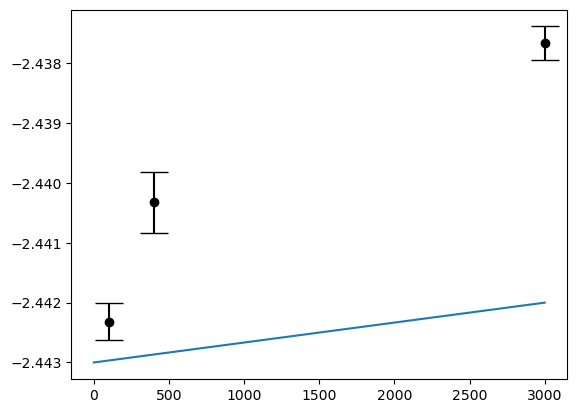

In [77]:
B = [3000, 400, 100]
plt.errorbar(B, [m1, m2, m3], yerr = [s1, s2, s3], marker = 'o', linestyle = 'None', color = 'k', capsize = 10, label = 'Phase (filtered)')
plt.plot([0, 3000], [-2.443, -2.443+0.001])

In [122]:
# Lock in

In [515]:
def lockin_ext_signal_fup(data, ext_sig, phase, fs, BW_pre, BW, BW2, mode):
    time = np.array(range(len(data)))/fs
    esfft = np.fft.rfft(ext_sig[:])
    demod_freq_arg = (np.argmax(np.abs(esfft)))
    if np.abs(esfft)[demod_freq_arg+1]>np.abs(esfft)[demod_freq_arg-1]:
        freq_add = np.abs(esfft)[demod_freq_arg+1]/(np.abs(esfft)[demod_freq_arg]+np.abs(esfft)[demod_freq_arg+1])
    else:
        freq_add = -np.abs(esfft)[demod_freq_arg-1]/(np.abs(esfft)[demod_freq_arg]+np.abs(esfft)[demod_freq_arg-1])
    demod_freq = (demod_freq_arg + freq_add)*fs/len(ext_sig)
    ext_sig_phase = cmath.phase(esfft[demod_freq_arg])
    demod = np.sin(2*np.pi*demod_freq*time+ext_sig_phase+phase)
    demod2 = np.cos(2*np.pi*demod_freq*time+ext_sig_phase+phase)
    if BW_pre != 0:
            data = au.butter_bandpass_filter(data, demod_freq - BW_pre, demod_freq + BW_pre, fs, order = 3)
    X_tt = data*demod
    Y_tt = data*demod2
    X_tt_filt = au.butter_lowpass_filter(X_tt, BW, fs, order = 3)
    Y_tt_filt = au.butter_lowpass_filter(Y_tt, BW, fs, order = 3)
    if mode == 'XY':
        return time, X_tt_filt, Y_tt_filt, demod, demod2
    elif mode == 'R':
        R2 = X_tt_filt**2 + Y_tt_filt**2
        theta = np.unwrap(-2*np.arctan(Y_tt_filt[1:]/X_tt_filt[1:]))/2
        R2_filt = au.butter_lowpass_filter(R2, BW2, fs, order = 2)
        theta_filt = au.butter_lowpass_filter(theta, BW2, fs, order = 2)
        return time, R2, theta, R2_filt, theta_filt
    else:
        return 0
    
def lockin_test(data, ext_sig, phase, fs):
    time = np.array(range(len(data)))/fs
    esfft = np.fft.rfft(ext_sig[:])
    demod_freq_arg = (np.argmax(np.abs(esfft)))
    if np.abs(esfft)[demod_freq_arg+1]>np.abs(esfft)[demod_freq_arg-1]:
        freq_add = np.abs(esfft)[demod_freq_arg+1]/(np.abs(esfft)[demod_freq_arg]+np.abs(esfft)[demod_freq_arg+1])
    else:
        freq_add = -np.abs(esfft)[demod_freq_arg-1]/(np.abs(esfft)[demod_freq_arg]+np.abs(esfft)[demod_freq_arg-1])
    demod_freq = (demod_freq_arg + freq_add)*fs/len(ext_sig)
    ext_sig_phase = cmath.phase(esfft[demod_freq_arg])
    demod = np.sin(2*np.pi*demod_freq*time+ext_sig_phase+phase)
    demod2 = np.cos(2*np.pi*demod_freq*time+ext_sig_phase+phase)
    return time, demod, demod2

In [528]:
freqs = [5500]
numfiles = 10
int_n = 10**5
file_n = 10**7
samples_per_file = int(file_n/int_n)
positions = [0]#[0, 1, 2]
cycles = [1]#np.linspace(0, 9, 10, dtype = int)
directions = [2]#[1, 2]
Y_mean = []
X_mean = []

for cycle in cycles:
    for direction in directions:
        for position in positions:
            path = r'D:\Lab Data\lorentz_force\sphere20250604\20250610\2 V\pos'+str(position)+' '+str(direction)+str(cycle)+r'\tt'
            files = np.linspace(0, numfiles-1, numfiles, dtype = int)
            end = '.hdf5'
            for file in files:
                filename = path+str(file)+end
                data, attrs = au.load_data_lf(filename)
                sig = data['channel_d']
                drive = data['channel_f']
                sig_filt = au.butter_bandpass_filter(sig, 55000-10, 55000+10, fs = 10**6, order = 3)
                time, X, Y, d, d2 = lockin_ext_signal_fup(sig, drive, -0.45, 10**6, 0, 40, 40, 'XY')
                lb = 10**6
                ub = 9*10**6
                for i in range(8):
                    Y_mean.append(np.mean(Y[i*lb:(i+1)*ub]))
                    X_mean.append(np.mean(X[i*lb:(i+1)*ub]))

0.00011083264459725568 9.620281396730986e-06
0.0024861969819584004 5.466253098845809e-05


Text(0.5, 0, 'Time (0.1s))')

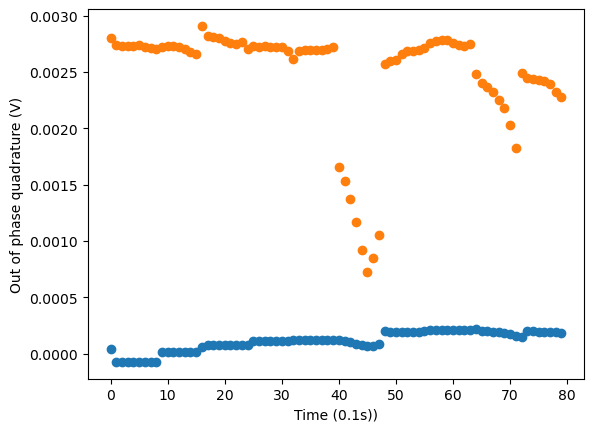

In [529]:
plt.plot(Y_mean, 'o')
print(np.mean(Y_mean), np.std(Y_mean)/np.sqrt(len(Y_mean)))
plt.plot(X_mean, 'o')
print(np.mean(X_mean), np.std(X_mean)/np.sqrt(len(X_mean)))
plt.ylabel('Out of phase quadrature (V)')
plt.xlabel('Time (0.1s))')

In [ ]:
0.00013

In [535]:
phase = -0.4

filename = r'D:\Lab Data\lorentz_force\sphere20250604\20250610\2 V\pos0 21\tt2.hdf5'
data, attrs = au.load_data_lf(filename)
sig = data['channel_d']
drive = data['channel_f']

sig_filt = au.butter_bandpass_filter(sig, 55000-10, 55000+10, fs = 10**6, order = 3)
time, X, Y, d, d2 = lockin_ext_signal_fup(sig_filt, drive, phase, 10**6, 0, 40, 40, 'XY')

filename = r'D:\Lab Data\lorentz_force\sphere20250604\20250610\2 V\pos0 21\tt9.hdf5'
data, attrs = au.load_data_lf(filename)
sig = data['channel_d']
drive2 = data['channel_f']

sig_filt2 = au.butter_bandpass_filter(sig, 55000-10, 55000+10, fs = 10**6, order = 3)
time2, X2, Y2, d_2, d2_2 = lockin_ext_signal_fup(sig_filt2, drive2, phase, 10**6, 0, 40, 40, 'XY')

MemoryError: Unable to allocate 76.3 MiB for an array with shape (10000000,) and data type float64

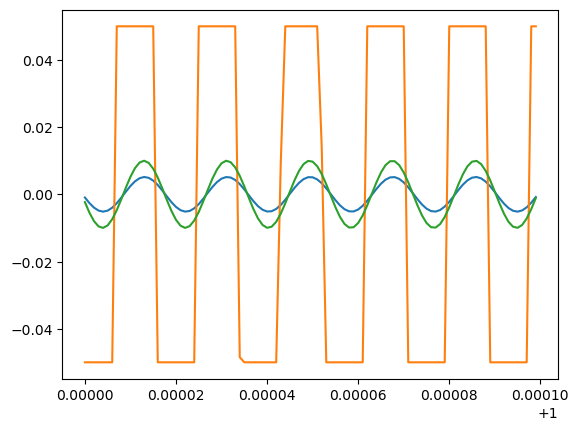

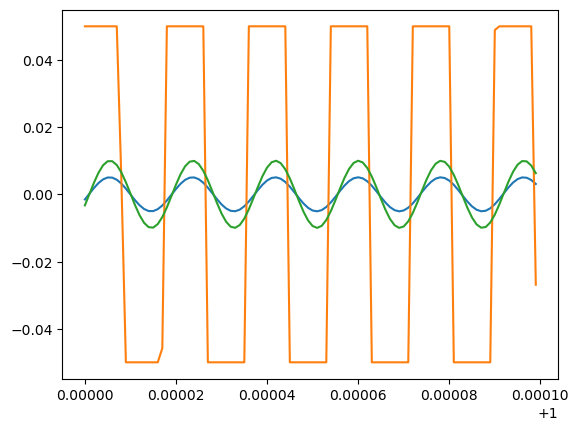

In [536]:
plt.plot(time[10**6:10**6+100], sig_filt[10**6:10**6+100])
plt.plot(time[10**6:10**6+100], drive[10**6:10**6+100])
plt.plot(time[10**6:10**6+100], d[10**6:10**6+100]/100)
plt.figure()
plt.plot(time[10**6:10**6+100], sig_filt2[10**6:10**6+100])
plt.plot(time[10**6:10**6+100], drive2[10**6:10**6+100])
plt.plot(time[10**6:10**6+100], d_2[10**6:10**6+100]/100)

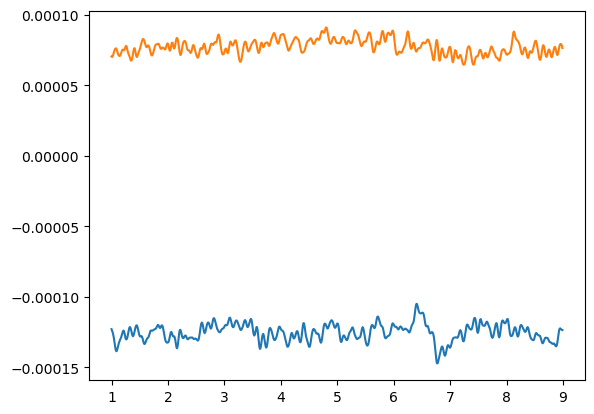

In [537]:
lb = 10**6
ub = 9*10**6
s = 10**4
plt.plot(time[lb:ub:s], Y[lb:ub:s])
plt.plot(time2[lb:ub:s], Y2[lb:ub:s])

In [539]:
plt.plot(np.arctan(Y/X)[lb:ub:s])
plt.plot(np.arctan(Y2/X2)[lb:ub:s])

MemoryError: Unable to allocate 76.3 MiB for an array with shape (10000000,) and data type float64

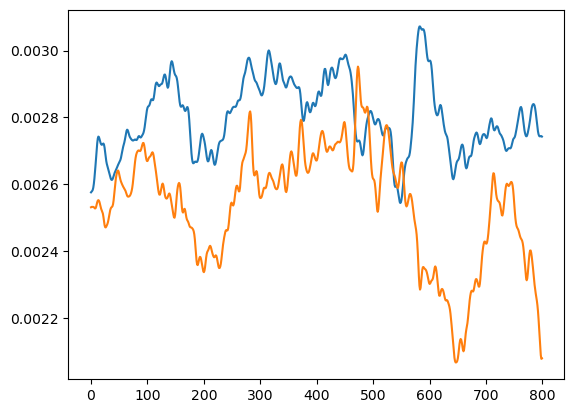

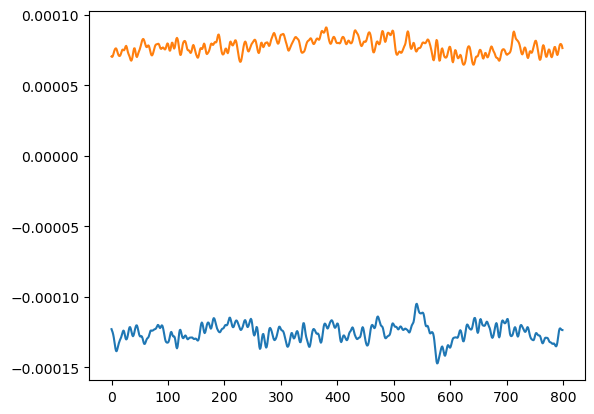

In [ ]:
plt.plot(X[lb:ub:s])
plt.plot(X2[lb:ub:s])
plt.figure()
plt.plot(Y[lb:ub:s])
plt.plot(Y2[lb:ub:s])